In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import sqrt

import DataAid
import Neros

In [2]:
# Collect the data from each of the folders
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")

In [3]:
# Get the galaxies we want from each source
NGC5371 = np.array(sparcGalaxies['NGC5371_rotmod'])
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])

## Parsing out the columns from the data

In [4]:
NGC5371_rad = NGC5371[:,0]
NGC5371_Vobs = NGC5371[:,1]
NGC5371_gas = NGC5371[:,3]
NGC5371_disk = NGC5371[:,4]
NGC5371_bulge = NGC5371[:,5]
NGC5371_VlumSquared = Neros.VlumSquared(NGC5371_gas, NGC5371_disk, NGC5371_bulge)

MW_rad = MWXueSofue[:,0]
MW_Vobs = MWXueSofue[:,1]
# Interpolation function
MW_Vobs_interp = interp1d(MW_rad, MW_Vobs, kind='cubic')

## Plotting our galaxy data ##
Now that we have the data for the Milky Way and NGC5371, we can plot them side by side. In this example we will plot their LUM mass and Radius.

In [5]:
# Plot both galaxies side by side
plt.plot(NGC5371_rad, NGC5371_lum, MW_rad, MW_Vobs)
plt.legend(['NGC5371', 'Milky Way', 'cubic'], loc='best')
plt.xlabel('Radius (KPC)')
plt.ylabel('LUM mass')
plt.title('SPARC Milky Way')
plt.show()

NameError: name 'NGC5371_lum' is not defined

## Plotting Interpolation Function ##
It's nice to have the data, but we need to access values for LUM mass for the Milky Way at radii that aren't exactly given in the data. We use an interpolator (interp1d) that will make a very good guess as to what that value will be. Here is an example that creates an interpolator for the Milky Way, then plots a point at a given radius for NGC5371 that doesn't specifically exist in the data.

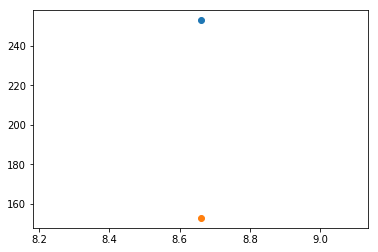

In [24]:
NG_rad = NGC5371_rad[5]
NG_y = NGC5371_lum[5]

plt.plot(NG_rad, NG_y, 'o', NG_rad, MW_interp(NG_rad), 'o')
plt.show()

# Plotting Vlum Squared #
Now that we can get values for galaxies at ANY given radius, we need to calculate vSquared. This is the final step towards calculating phi. We will calculate vSquared at every radius for NGC5371, and then calculate vSqured with the same radii (those that are in the NGC5371's data set but NOT MW's) on the Milky Way data. 

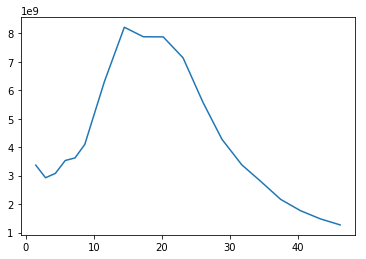

In [26]:
# Plot our function of r -> vSquared
plt.plot(NGC5371_rad, NGC_vSquared*NGC5371_Vlum)
plt.show()

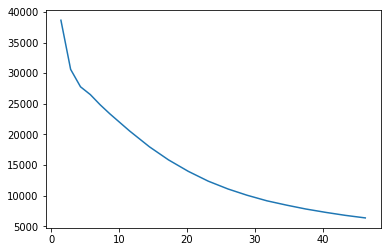

In [20]:
# Calculate vSquared for MW with other galaxies radii
MW_v = [mw_function(r) for r in NGC5371_rad]
MW_vSquared = [r ** 2 for r in MW_v]
# Plot our function of r -> vSquared
plt.plot(NGC5371_rad, MW_vSquared)
plt.show()

## Phi Calculation Example##
The phi function takes an array of radii and the vSquared for a galaxy, and then calculates phi at every radius (returning an array the same size as the radius array)

In [21]:
# Calculate Phi for each galaxy
NGC_phi = phi.CalcWithRadiiAndVSquared(NGC5371_rad, NGC_vSquared)
NGC_phi = [x for x in NGC_phi]
print(NGC_phi)

NameError: name 'phi' is not defined

## Here is Phi for the Milky Way and all other galaxies##
Now that we can get vSquared for each galaxy at any given radius, we run the vSquared and radii arrays for EVERY GALAXY through phi.CalcWithRadiiAndVSquared to get phi for every galaxy!

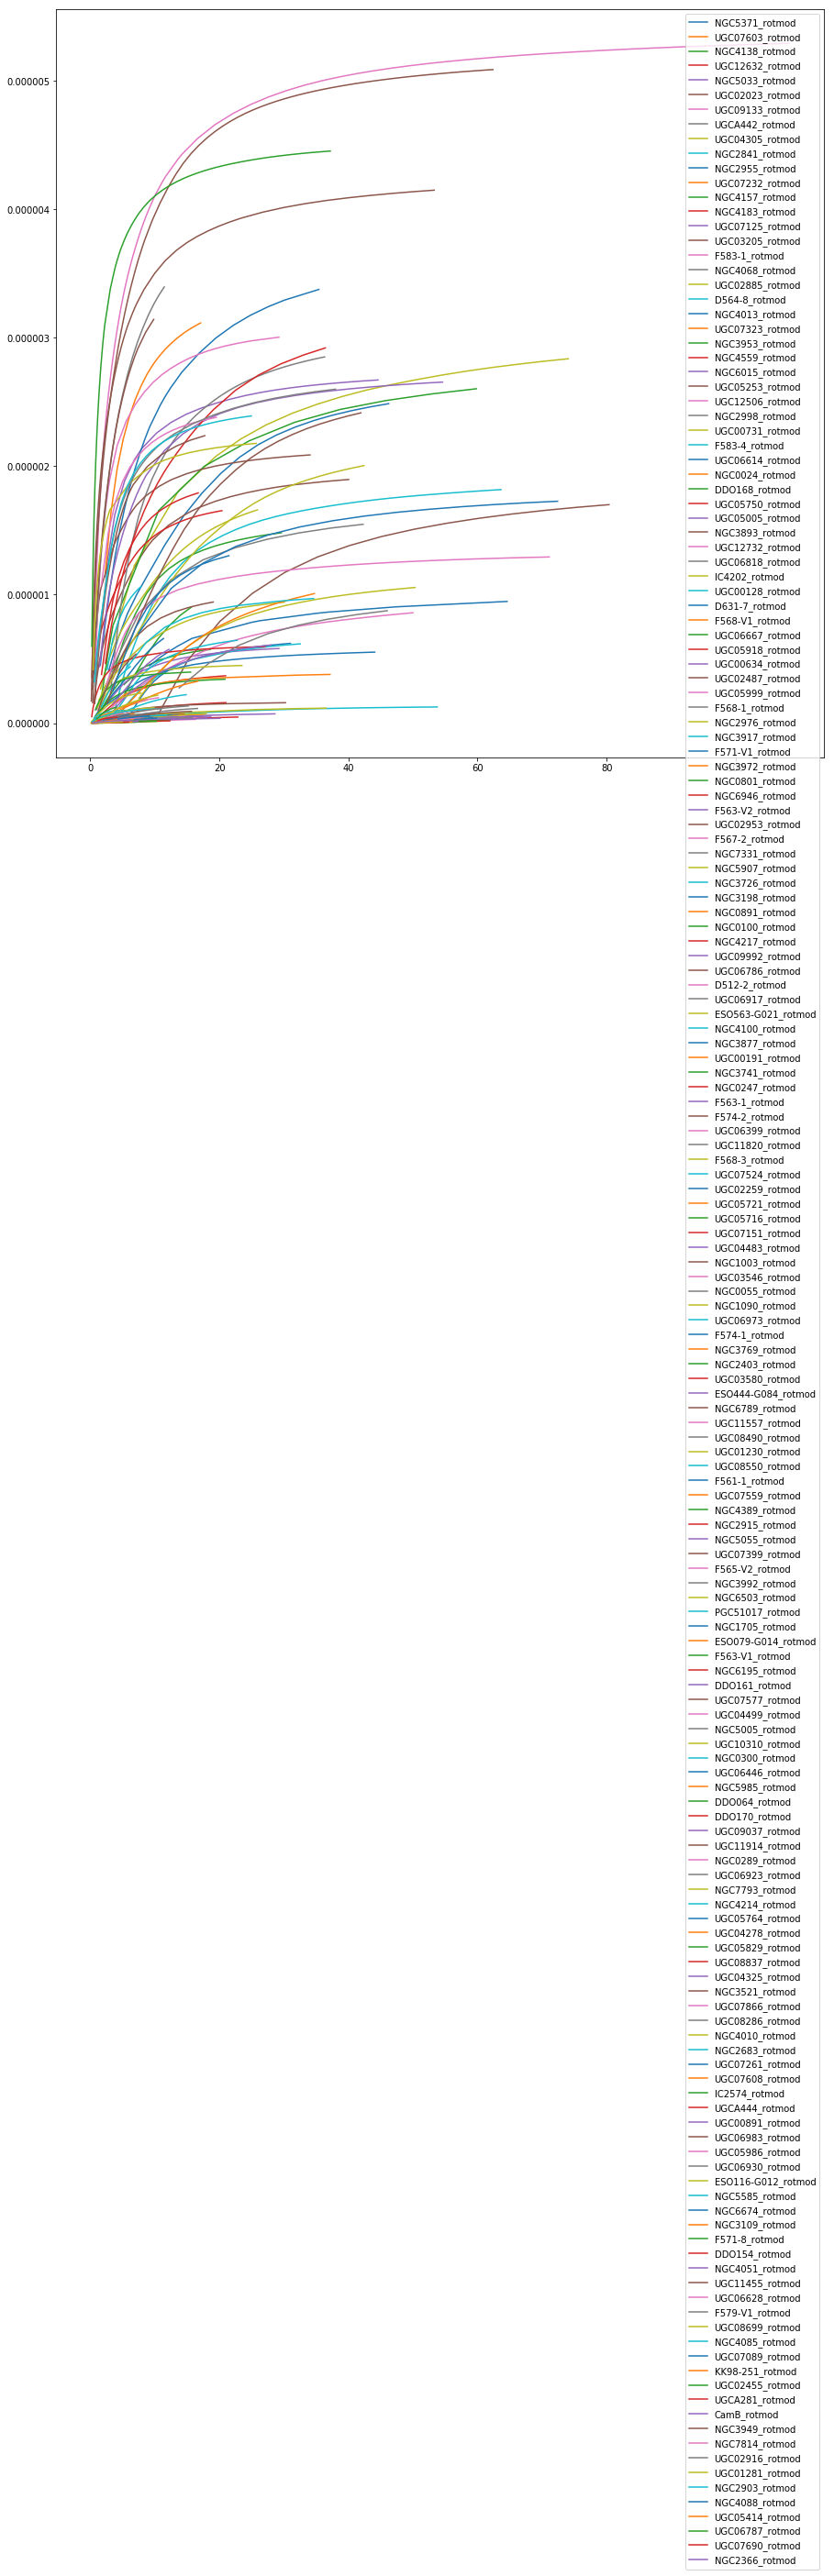

In [18]:
# Create a dictionary to store the phis for later use
galaxyPhis = {}

# Initialize the plot
f, ax = plt.subplots(1, figsize=(15,15))

for galaxyName in sparcGalaxies:
    galaxy = np.array(sparcGalaxies[galaxyName])
    radii = galaxy[:,0]
    gas = galaxy[:,3]
    disk = galaxy[:,4]
    bulge = galaxy[:,5]
    vSquared = gas*gas + disk*disk + bulge*bulge
    # Calculate phi
    galaxyPhi = phi.CalcWithRadiiAndVSquared(radii, vSquared)
    # Store phi
    galaxyPhhis[galaxyName] = galaxyPhi
    
    ax.plot(radii[1:], galaxyPhi, label=galaxyName)

ax.legend(loc="upper right")